## Лабораторная работа №1: Линейная регрессия
### Кредитный скоринг
**Данные:**
* ApplicationDate: Дата подачи заявки на кредит
* Age: Возраст заявителя
* AnnualIncome: Годовой доход
* CreditScore: Оценка кредитоспособности
* LoanAmount: Запрашиваемая сумма кредита
* LoanDuration: Срок погашения кредита
* MaritalStatus: Семейное положение заявителя
* NumberOfDependents: Количество иждивенцев
* HomeOwnershipStatus: Статус владения жильем
* MonthlyDebtPayments: Ежемесячные обязательства по долгам
* CreditCardUtilizationRate: Процент использования кредитной карты
* NumberOfOpenCreditLines: Активные кредитные линии
* NumberOfCreditInquiries: Количество запросов на кредит
* DebtToIncomeRatio: Соотношение долга к доходу
* BankruptcyHistory: История банкротств
* LoanPurpose: Цель кредита
* PreviousLoanDefaults: Предыдущие дефолты по кредитам
* PaymentHistory: История платежей
* LengthOfCreditHistory: Длительность кредитной истории
* SavingsAccountBalance: Баланс сберегательного счета
* CheckingAccountBalance: Баланс расчетного счета
* TotalAssets: Общая стоимость активов
* TotalLiabilities: Общая сумма обязательств
* MonthlyIncome: Ежемесячный доход
* UtilityBillsPaymentHistory: История платежей по коммунальным услугам
* JobTenure: Длительность работы на текущем месте
* EmploymentStatus: Статус занятости
* EducationLevel: Уровень образования
* Experience: Опыт работы
* NetWorth: Чистая стоимость активов
* BaseInterestRate: Базовая процентная ставка
* InterestRate: Применяемая процентная ставка
* MonthlyLoanPayment: Ежемесячный платеж по кредиту
* TotalDebtToIncomeRatio: Общее соотношение долга к доходу
* RiskScore: Оценка риска

**Цель: MSE <= 25**

# Решение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# настройки для визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1. Загрузка и первичный анализ

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Признаков в train: {train.shape[1]}")
print(f"Признаков в test: {test.shape[1]}")

Train shape: (11017, 35)
Test shape: (5000, 35)
Признаков в train: 35
Признаков в test: 35


In [3]:
print("Первые строки обучающей выборки:")
display(train.head())

print("ТИпизация:")
print(train.info())


Первые строки обучающей выборки:


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


ТИпизация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio   

In [4]:
print("Статистика по числовым признакам:")
display(train.describe().round(2))


Статистика по числовым признакам:


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,10487.00,10487.00,9986.00,9986.00,10487.00,10487.00,9986.00,10487.00,10487.00,10487.00,...,10487.00,10487.00,10487.00,10487.00,9986.00,9986.00,10487.00,10487.00,10487.00,10487.00
mean,39.85,131587.87,678.08,29874.22,53.44,1.57,546.46,0.28,3.03,0.98,...,10838.93,0.78,4.95,17.63,154238.13,0.20,0.20,1075.62,0.52,-25698.78
std,11.61,115791.94,175.19,27705.51,24.49,1.42,501.98,0.16,1.74,0.99,...,9385.92,0.12,2.20,11.34,462222.93,0.09,0.10,1344.05,0.89,1431674.59
min,18.00,15000.00,300.00,1063.00,12.00,0.00,13.00,0.00,0.00,0.00,...,1250.00,0.26,0.00,0.00,1004.00,0.05,0.05,30.01,0.01,-9999999.00
25%,32.00,20959.50,550.00,12658.00,36.00,0.00,233.25,0.16,2.00,0.00,...,1683.54,0.71,3.00,9.00,7252.50,0.12,0.12,375.87,0.07,32.56
50%,40.00,89015.00,722.50,21828.50,48.00,1.00,398.00,0.26,3.00,1.00,...,7371.25,0.80,5.00,17.00,27429.50,0.18,0.18,684.88,0.18,44.12
75%,48.00,257025.00,850.00,37158.00,60.00,3.00,685.00,0.39,4.00,2.00,...,21232.58,0.88,6.00,26.00,124175.75,0.26,0.26,1279.93,0.64,65.36
max,80.00,748508.00,850.00,418997.00,120.00,6.00,10879.00,0.91,12.00,6.00,...,25000.00,1.00,17.00,57.00,11261170.00,0.72,0.83,29634.81,24.38,10000000.00


In [5]:
# Проверка пропусков
print("Анализ пропусков:")
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print(f"Найдено признаков с пропусками: {len(missing)}")
    display(pd.DataFrame({
        'Признак': missing.index,
        'Пропусков': missing.values,
        'Процент': (missing.values / len(train) * 100).round(2)
    }))
else:
    print("Пропусков в данных нет")


Анализ пропусков:
Найдено признаков с пропусками: 35


,Признак,Пропусков,Процент
0,TotalAssets,1031,9.36
1,CreditScore,1031,9.36
2,LoanAmount,1031,9.36
3,BaseInterestRate,1031,9.36
4,NetWorth,1031,9.36
5,MonthlyDebtPayments,1031,9.36
6,CheckingAccountBalance,1031,9.36
7,LoanPurpose,1031,9.36
8,BankruptcyHistory,1031,9.36
9,JobTenure,530,4.81


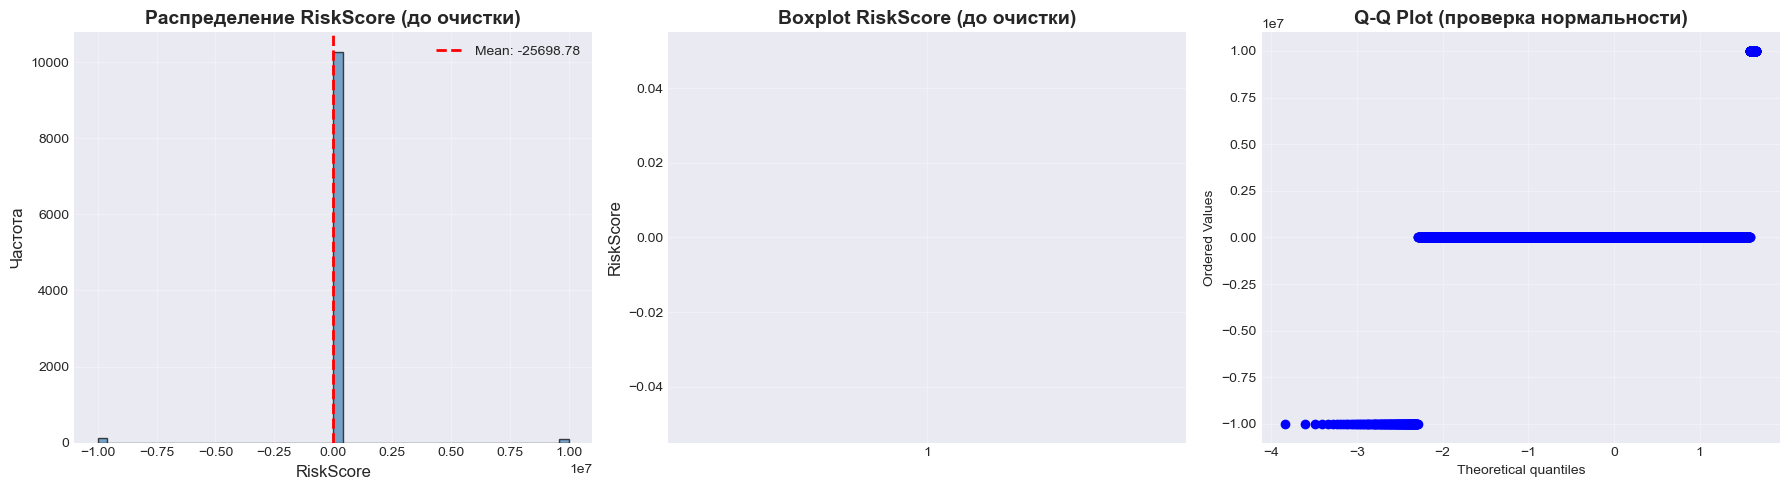

Статистика таргета (до очистки)
Количество значений: 11017
Min RiskScore: -9999999.00
Max RiskScore: 10000000.00
Mean RiskScore: -25698.78
Median RiskScore: 44.12
Std RiskScore: 1431674.59
25% квантиль: 32.56
75% квантиль: 65.36


In [6]:
# визуализация распределения таргета (ДО ОЧИСТКИ)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# гистограмма
axes[0].hist(train['RiskScore'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('RiskScore', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].set_title('Распределение RiskScore (до очистки)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axvline(train['RiskScore'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {train["RiskScore"].mean():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(train['RiskScore'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[1].set_ylabel('RiskScore', fontsize=12)
axes[1].set_title('Boxplot RiskScore (до очистки)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# QQ-plot (для проверки нормальности)
from scipy import stats
stats.probplot(train['RiskScore'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (проверка нормальности)', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# статистика
print("Статистика таргета (до очистки)")
print(f"Количество значений: {len(train['RiskScore'])}")
print(f"Min RiskScore: {train['RiskScore'].min():.2f}")
print(f"Max RiskScore: {train['RiskScore'].max():.2f}")
print(f"Mean RiskScore: {train['RiskScore'].mean():.2f}")
print(f"Median RiskScore: {train['RiskScore'].median():.2f}")
print(f"Std RiskScore: {train['RiskScore'].std():.2f}")
print(f"25% квантиль: {train['RiskScore'].quantile(0.25):.2f}")
print(f"75% квантиль: {train['RiskScore'].quantile(0.75):.2f}")


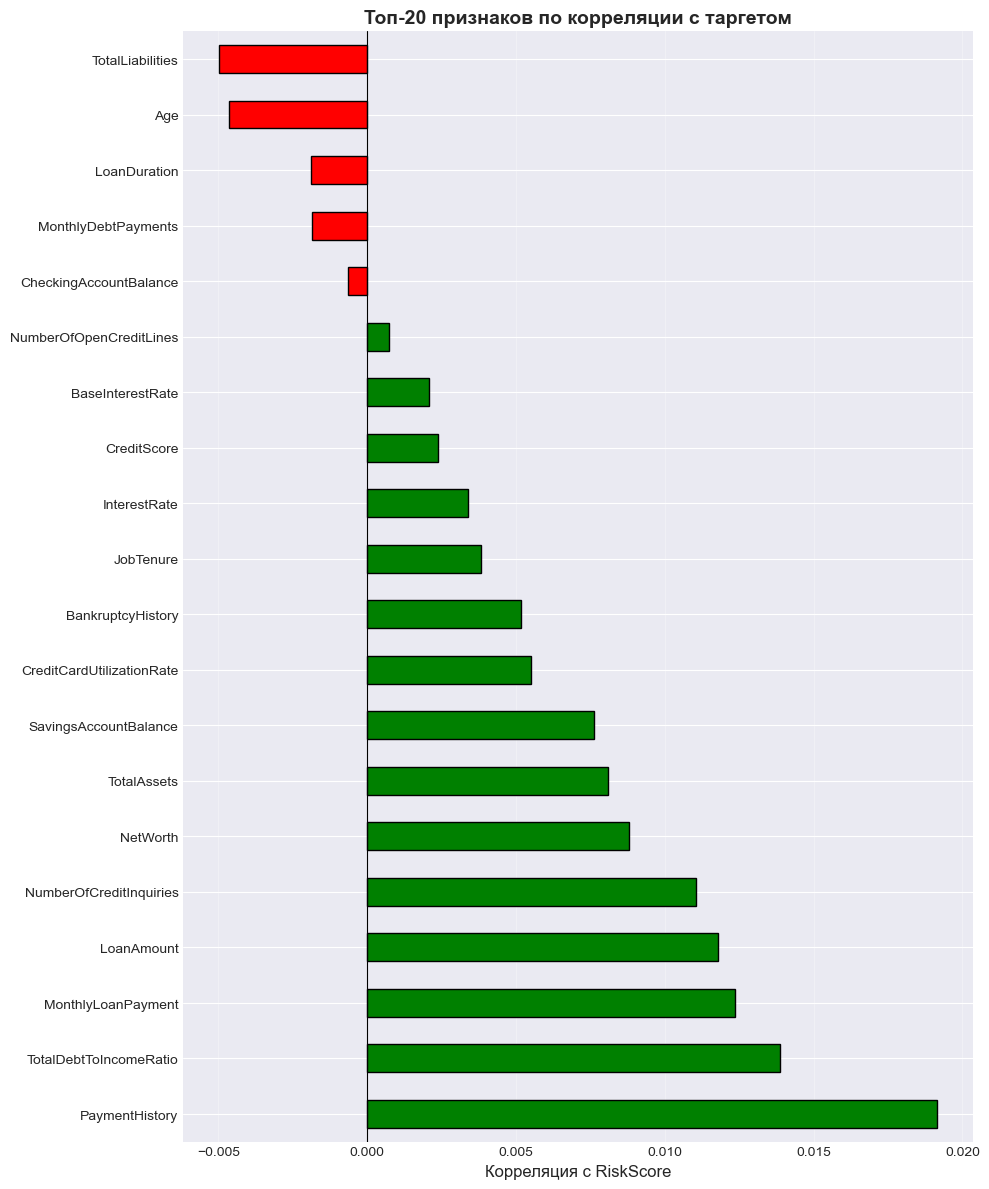

Топ-10 признаков по корреляции с RiskScore
 1. PaymentHistory                      → +0.0191
 2. TotalDebtToIncomeRatio              → +0.0139
 3. MonthlyLoanPayment                  → +0.0124
 4. LoanAmount                          → +0.0118
 5. NumberOfCreditInquiries             → +0.0111
 6. NetWorth                            → +0.0088
 7. TotalAssets                         → +0.0081
 8. SavingsAccountBalance               → +0.0076
 9. CreditCardUtilizationRate           → +0.0055
10. BankruptcyHistory                   → +0.0052


In [7]:
# Корреляция числовых признаков с таргетом
numeric_cols = train.select_dtypes(include=[np.number]).columns
correlations = train[numeric_cols].corrwith(train['RiskScore']).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
top_20_corr = correlations.drop('RiskScore').head(20)
colors = ['green' if x > 0 else 'red' for x in top_20_corr.values]
top_20_corr.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Корреляция с RiskScore', fontsize=12)
plt.title('Топ-20 признаков по корреляции с таргетом', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Топ-10 признаков по корреляции с RiskScore")
for i, (feat, corr) in enumerate(correlations.drop('RiskScore').head(10).items(), 1):
    print(f"{i:2d}. {feat:35s} → {corr:+.4f}")


### 2. Очистка данных и предобработка

In [8]:
original_len = len(train)

# удаляем дубликаты
train = train.drop_duplicates()
after_duplicates = len(train)

# удаляем строки с пропусками в таргете
train = train.dropna(subset=['RiskScore'])
after_na = len(train)

# удаляем экстремальные выбросы (физически невозможные значения)
train = train[(train['RiskScore'] > -1e5) & (train['RiskScore'] < 1e5)]
after_extremes = len(train)

# удаляем статистические выбросы (по квантилям)
low, high = train['RiskScore'].quantile([0.001, 0.999])
train = train[(train['RiskScore'] >= low) & (train['RiskScore'] <= high)]
after_quantiles = len(train)

print("Результаты очистки:")
print(f"Исходное кол-во строк:       {original_len:5d}")
print(f"После удаления дубликатов:      {after_duplicates:5d}  (удалено: {original_len - after_duplicates})")
print(f"После удаления NA в таргете:    {after_na:5d}  (удалено: {after_duplicates - after_na})")
print(f"После фильтра экстремумов:      {after_extremes:5d}  (удалено: {after_na - after_extremes})")
print(f"После фильтра по квантилям:     {after_quantiles:5d}  (удалено: {after_extremes - after_quantiles})")
print(f"\nИтого удалено строк: {original_len - after_quantiles} ({(original_len - after_quantiles)/original_len*100:.1f}%)")
print(f"Осталось строк: {after_quantiles}")
print(f"Новый диапазон RiskScore: [{low:.2f}, {high:.2f}]")


Результаты очистки:
Исходное кол-во строк:       11017
После удаления дубликатов:      10001  (удалено: 1016)
После удаления NA в таргете:    10000  (удалено: 1)
После фильтра экстремумов:       9788  (удалено: 212)
После фильтра по квантилям:      9768  (удалено: 20)

Итого удалено строк: 1249 (11.3%)
Осталось строк: 9768
Новый диапазон RiskScore: [20.24, 91.44]


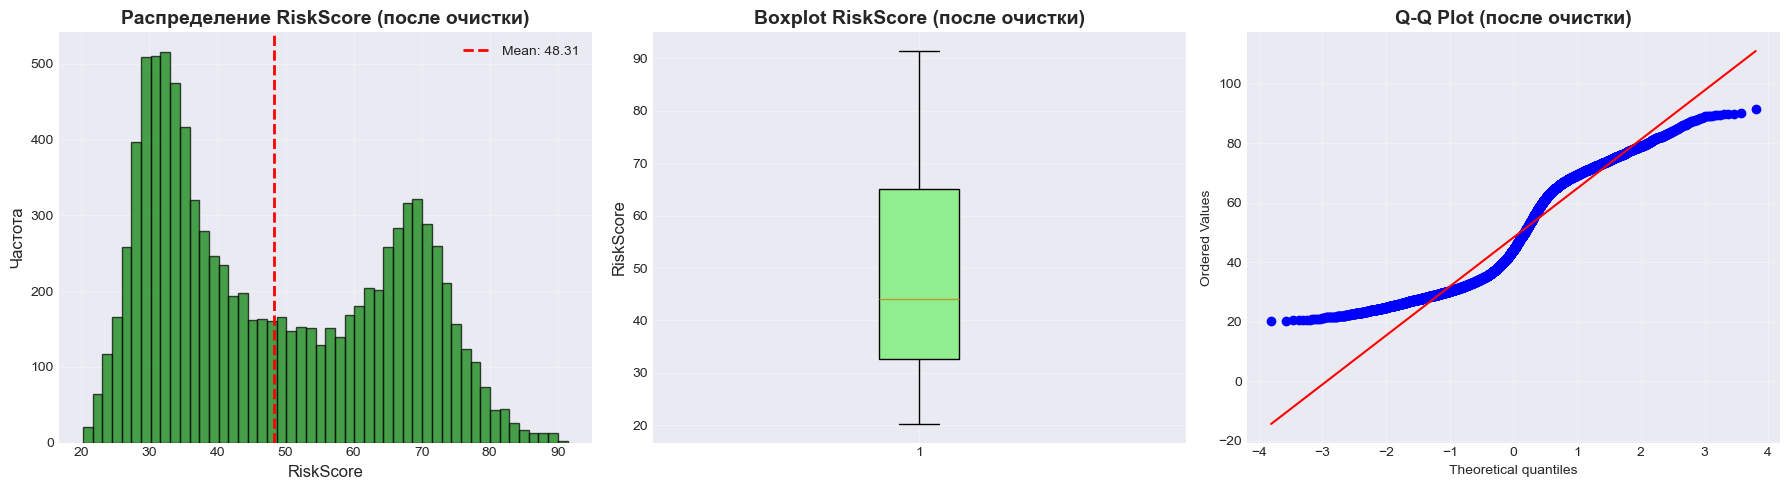

Статистика по таргету (после очистки)
Количество значений: 9768
Min RiskScore: 20.24
Max RiskScore: 91.43
Mean RiskScore: 48.31
Median RiskScore: 44.18
Std RiskScore: 17.16


In [9]:
# визуализация распределения таргета (ПОСЛЕ ОЧИСТКИ)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# гистограмма
axes[0].hist(train['RiskScore'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('RiskScore', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].set_title('Распределение RiskScore (после очистки)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axvline(train['RiskScore'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {train["RiskScore"].mean():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(train['RiskScore'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen'))
axes[1].set_ylabel('RiskScore', fontsize=12)
axes[1].set_title('Boxplot RiskScore (после очистки)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# QQ-plot
stats.probplot(train['RiskScore'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (после очистки)', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


print("Статистика по таргету (после очистки)")
print(f"Количество значений: {len(train['RiskScore'])}")
print(f"Min RiskScore: {train['RiskScore'].min():.2f}")
print(f"Max RiskScore: {train['RiskScore'].max():.2f}")
print(f"Mean RiskScore: {train['RiskScore'].mean():.2f}")
print(f"Median RiskScore: {train['RiskScore'].median():.2f}")
print(f"Std RiskScore: {train['RiskScore'].std():.2f}")


### 3. Преобразование категориальны х признаков

In [10]:
# определим кат признаки
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

print(f"Найдено категориальных признаков: {len(categorical_cols)}")
print("\nСписок категориальных признаков:")
for i, col in enumerate(categorical_cols, 1):
    unique_count = train[col].nunique()
    print(f"{i}. {col:30s} → {unique_count:3d} уникальных значений")

# one-hot encoding
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

print(f"Размер train после кодирования: {train.shape}")
print(f"Размер test после кодирования: {test.shape}")

Найдено категориальных признаков: 6

Список категориальных признаков:
1. ApplicationDate                → 9768 уникальных значений
2. MaritalStatus                  →   4 уникальных значений
3. HomeOwnershipStatus            →   4 уникальных значений
4. LoanPurpose                    →   5 уникальных значений
5. EmploymentStatus               →   3 уникальных значений
6. EducationLevel                 →   5 уникальных значений
Размер train после кодирования: (9768, 9812)
Размер test после кодирования: (5000, 5044)


In [11]:
# синхронизируем колонки train и test после кодирования

train_cols = set(train.columns)
test_cols = set(test.columns)

# находим различия
missing_in_test = train_cols - test_cols - {'RiskScore'}  # без таргета
extra_in_test = test_cols - train_cols

print(f"Колонок только в train: {len(missing_in_test)}")
print(f"Колонок только в test: {len(extra_in_test)}")

# добавляем недостающие колонки в test (заполняем нулями)
if missing_in_test:
    add_df = pd.DataFrame(0, index=test.index, columns=list(missing_in_test))
    test = pd.concat([test, add_df], axis=1)

# удаляем лишние колонки из test
if extra_in_test:
    test.drop(columns=list(extra_in_test), inplace=True, errors='ignore')

# приводим порядок колонок к train
test = test[train.drop(columns=['RiskScore']).columns].copy()

print(f"\nПосле синхронизации размер train: {train.shape}")
print(f"После синхронизации размер test: {test.shape}")
print(f"Количество признаков совпадает: {train.shape[1] - 1 == test.shape[1]}")

Колонок только в train: 9767
Колонок только в test: 5000

После синхронизации размер train: (9768, 9812)
После синхронизации размер test: (5000, 9811)
Количество признаков совпадает: True


### 4. Обработка пропусков и выбросов в фичах

In [12]:
processed_count = 0

for col in train.columns:
    if col == 'RiskScore':
        continue
    
    # обрабатываем только числовые признаки (не бинарные dummy)
    if pd.api.types.is_numeric_dtype(train[col]) and not pd.api.types.is_bool_dtype(train[col]):
        # clipping выбросов по квантилям
        low, high = train[col].quantile([0.01, 0.99])
        train[col] = train[col].clip(lower=low, upper=high)
        test[col] = test[col].clip(lower=low, upper=high)
        
        # заполняем пропуски медианой
        med = train[col].median()
        train[col] = train[col].fillna(med)
        test[col] = test[col].fillna(med)
        
        processed_count += 1

print(f"Обработано числовых признаков: {processed_count}")
print(f"Осталось признаков в train: {train.shape[1]}")
print(f"Осталось признаков в test: {test.shape[1]}")

Обработано числовых признаков: 28
Осталось признаков в train: 9812
Осталось признаков в test: 9811


### 5. Создание признаков

In [13]:
TOP_N_FEATURES = 50        # кол-во признаков для отбора
POLY_DEGREE_2 = 25         # кол-во признаков для полиномов степени 2
POLY_DEGREE_3 = 15         # кол-во признаков для полиномов степени 3
POLY_DEGREE_4 = 5          # кол-во признаков для полиномов степени 4
INTERACTION_FEATURES = 12  # кол-во признаков для взаимодействий
TRANSFORM_FEATURES = 10    # кол-во признаков для трансформаций
TRANSFORM_INV = 5          # кол-во признаков для inverse-трансформации

target = 'RiskScore'

# отбор топ-признаков по корреляции
corrs = train.corrwith(train[target], numeric_only=True).abs().sort_values(ascending=False)
top_feats = corrs.index[1:TOP_N_FEATURES+1]  # без самого таргета

print(f"Отобрано: {len(top_feats)} признаков")
print(f"Минимальная корреляция: {corrs[top_feats[-1]]:.4f}")
print(f"Максимальная корреляция: {corrs[top_feats[0]]:.4f}")

# создаем df с отобранными признаками
df = train[top_feats.tolist() + [target]].copy()
df_test = test[top_feats.tolist()].copy()

print(f"Размер рабочего df: {df.shape}")


Отобрано: 50 признаков
Минимальная корреляция: 0.0231
Максимальная корреляция: 0.7702
Размер рабочего df: (9768, 51)


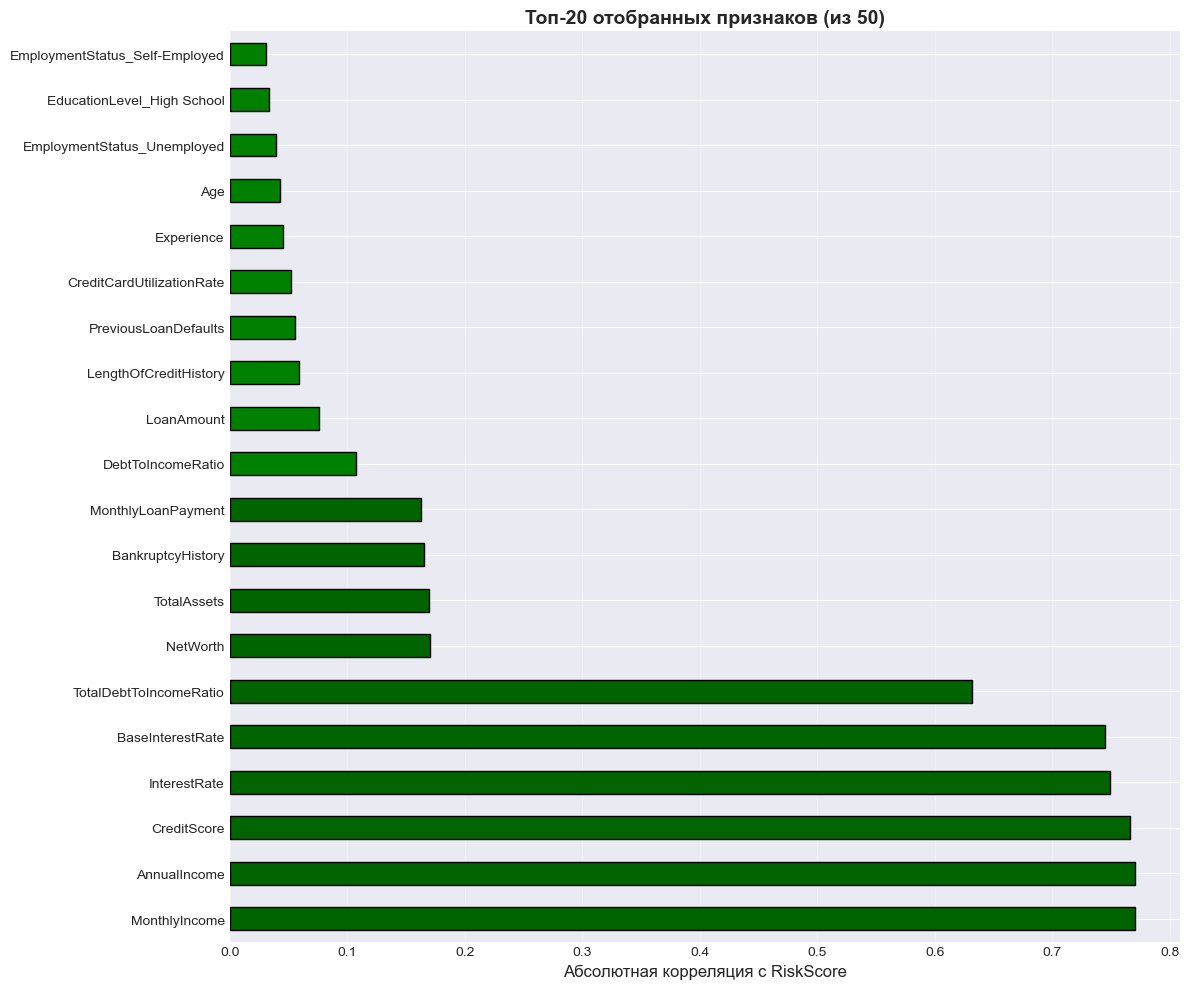

In [14]:
# визуализация отобранных признаков
plt.figure(figsize=(12, 10))
top_20_selected = corrs[top_feats].head(20)
colors = ['darkgreen' if i < 10 else 'green' if i < 20 else 'lightgreen' 
          for i in range(len(top_20_selected))]
top_20_selected.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Абсолютная корреляция с RiskScore', fontsize=12)
plt.title(f'Топ-20 отобранных признаков (из {TOP_N_FEATURES})', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [15]:
# cоздаем полиномиальные признаки
print(f"\nСоздаём полиномиальные признаки:")
print(f"Степень 2: {POLY_DEGREE_2} признаков")
print(f"Степень 3: {POLY_DEGREE_3} признаков")
print(f"Степень 4: {POLY_DEGREE_4} признаков")

# степень 2 (для топ-25 признаков)
for f in top_feats[:POLY_DEGREE_2]:
    df[f'{f}_2'] = df[f] ** 2
    df_test[f'{f}_2'] = df_test[f] ** 2

# степень 3 (для топ-15 признаков)
for f in top_feats[:POLY_DEGREE_3]:
    df[f'{f}_3'] = df[f] ** 3
    df_test[f'{f}_3'] = df_test[f] ** 3

# степень 4 (для топ-5 признаков)
for f in top_feats[:POLY_DEGREE_4]:
    df[f'{f}_4'] = df[f] ** 4
    df_test[f'{f}_4'] = df_test[f] ** 4

print(f"Текущий размер df: {df.shape}")


Создаём полиномиальные признаки:
Степень 2: 25 признаков
Степень 3: 15 признаков
Степень 4: 5 признаков
Текущий размер df: (9768, 96)


In [16]:
# создаем признаки взаимодействия
print(f"Используем топ-{INTERACTION_FEATURES} признаков")

comb_pairs = list(combinations(top_feats[:INTERACTION_FEATURES], 2))
print(f"Количество пар: C({INTERACTION_FEATURES}, 2) = {len(comb_pairs)}")

# создаем временные df с новыми признаками
df_new = pd.DataFrame({f'{a}x{b}': df[a] * df[b] for a, b in comb_pairs}, index=df.index)
df_test_new = pd.DataFrame({f'{a}x{b}': df_test[a] * df_test[b] for a, b in comb_pairs}, 
                           index=df_test.index)

df = pd.concat([df, df_new], axis=1)
df_test = pd.concat([df_test, df_test_new], axis=1)

print(f"Создано признаков взаимодействия: {len(comb_pairs)}")
print(f"Текущий размер df: {df.shape}")

Используем топ-12 признаков
Количество пар: C(12, 2) = 66
Создано признаков взаимодействия: 66
Текущий размер df: (9768, 162)


In [17]:
# создаем трансформированные признаки
print(f"Log и Sqrt: топ-{TRANSFORM_FEATURES} признаков")
print(f"Inverse: топ-{TRANSFORM_INV} признаков")

transformed = {}
transformed_test = {}

# log и sqrt трансформации
for f in top_feats[:TRANSFORM_FEATURES]:
    transformed[f'{f}_log'] = np.log1p(np.abs(df[f]))
    transformed_test[f'{f}_log'] = np.log1p(np.abs(df_test[f]))
    transformed[f'{f}_sqrt'] = np.sqrt(np.abs(df[f]))
    transformed_test[f'{f}_sqrt'] = np.sqrt(np.abs(df_test[f]))

# inverse трансформации
for f in top_feats[:TRANSFORM_INV]:
    transformed[f'{f}_inv'] = 1 / (np.abs(df[f]) + 1)
    transformed_test[f'{f}_inv'] = 1 / (np.abs(df_test[f]) + 1)

df = pd.concat([df, pd.DataFrame(transformed, index=df.index)], axis=1)
df_test = pd.concat([df_test, pd.DataFrame(transformed_test, index=df_test.index)], axis=1)

print(f"Текущий размер df: {df.shape}")

Log и Sqrt: топ-10 признаков
Inverse: топ-5 признаков
Текущий размер df: (9768, 187)


In [18]:
# создаем специфичные для кредитного скоринга признаки

extra_features = {}
extra_features_test = {}

# 1) консистентность дохода
if all(col in df.columns for col in ['AnnualIncome', 'MonthlyIncome']):
    extra_features['Income_consistency'] = df['AnnualIncome'] / (df['MonthlyIncome'] * 12 + 1)
    extra_features_test['Income_consistency'] = df_test['AnnualIncome'] / (df_test['MonthlyIncome'] * 12 + 1)
    print(f"Создан: Income_consistency (годовой доход / месячный×12)")

# 2) кредитный скор на единицу возраста
if all(col in df.columns for col in ['CreditScore', 'Age']):
    extra_features['Credit_per_age'] = df['CreditScore'] / (df['Age'] + 1)
    extra_features_test['Credit_per_age'] = df_test['CreditScore'] / (df_test['Age'] + 1)
    print(f"Создан: Credit_per_age (кредитный скор / возраст)")

# 3) отношение суммы кредита к годовому доходу
if all(col in df.columns for col in ['LoanAmount', 'AnnualIncome']):
    extra_features['Loan_to_annual_income'] = df['LoanAmount'] / (df['AnnualIncome'] + 1)
    extra_features_test['Loan_to_annual_income'] = df_test['LoanAmount'] / (df_test['AnnualIncome'] + 1)
    print(f"Создан: Loan_to_annual_income (сумма кредита / годовой доход)")

df = pd.concat([df, pd.DataFrame(extra_features, index=df.index)], axis=1)
df_test = pd.concat([df_test, pd.DataFrame(extra_features_test, index=df_test.index)], axis=1)

print(f"Текущий размер df: {df.shape}")

Создан: Income_consistency (годовой доход / месячный×12)
Создан: Credit_per_age (кредитный скор / возраст)
Создан: Loan_to_annual_income (сумма кредита / годовой доход)
Текущий размер df: (9768, 190)


### 6. Очистка NaN'ов и бесконечностей

In [19]:
# выбираем только числовые колонки
numeric_cols_train = df.drop(columns=[target]).select_dtypes(include=[np.number]).columns
numeric_cols_train = [col for col in numeric_cols_train 
                      if not pd.api.types.is_bool_dtype(df[col])]

numeric_cols_test = df_test.select_dtypes(include=[np.number]).columns
numeric_cols_test = [col for col in numeric_cols_test 
                     if not pd.api.types.is_bool_dtype(df_test[col])]

# кол-во до очистки (только для числовых колонок)
if len(numeric_cols_train) > 0:
    inf_count_train = np.isinf(df[numeric_cols_train].values).sum()
    nan_count_train = df[numeric_cols_train].isnull().sum().sum()
else:
    inf_count_train = 0
    nan_count_train = 0

if len(numeric_cols_test) > 0:
    inf_count_test = np.isinf(df_test[numeric_cols_test].values).sum()
    nan_count_test = df_test[numeric_cols_test].isnull().sum().sum()
else:
    inf_count_test = 0
    nan_count_test = 0

print(f"До очистки (только числовые колонки):")
print(f"Train: inf={inf_count_train}, NaN={nan_count_train}")
print(f"Test:  inf={inf_count_test}, NaN={nan_count_test}")

# заменяем бесконечности на nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# заменяем nan на 0
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# проверка после очистки
if len(numeric_cols_train) > 0:
    inf_after_train = np.isinf(df[numeric_cols_train].values).sum()
    nan_after_train = df[numeric_cols_train].isnull().sum().sum()
else:
    inf_after_train = 0
    nan_after_train = 0

if len(numeric_cols_test) > 0:
    inf_after_test = np.isinf(df_test[numeric_cols_test].values).sum()
    nan_after_test = df_test[numeric_cols_test].isnull().sum().sum()
else:
    inf_after_test = 0
    nan_after_test = 0

print(f"\nПосле очистки:")
print(f"Train: inf={inf_after_train}, NaN={nan_after_train}")
print(f"Test:  inf={inf_after_test}, NaN={nan_after_test}")


До очистки (только числовые колонки):
Train: inf=0, NaN=0
Test:  inf=0, NaN=0

После очистки:
Train: inf=0, NaN=0
Test:  inf=0, NaN=0


### 7. Удаление мультиколлинеарных признаков

In [20]:
# вычисляем корреляционную матрицу
corr_matrix = df.drop(columns=[target]).corr().abs()

# берем только верхний треугольник (чтобы не считать дважды)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# находим признаки с корр > 0.995
MULTICOLLINEARITY_THRESHOLD = 0.995
to_drop = [column for column in upper.columns if any(upper[column] > MULTICOLLINEARITY_THRESHOLD)]

print(f"\nНайдено мультиколлинеарных признаков: {len(to_drop)}")
print(f"Порог корреляции: {MULTICOLLINEARITY_THRESHOLD}")

if len(to_drop) > 0 and len(to_drop) <= 30:
    print(f"\nУдаляемые признаки:")
    for i, col in enumerate(to_drop, 1):
        print(f"   {i}. {col}")
elif len(to_drop) > 10:
    print(f"\nУдаляемые признаки (первые 10):")
    for i, col in enumerate(to_drop[:10], 1):
        print(f"   {i}. {col}")
    print(f"   ... и еще {len(to_drop) - 10}")

df.drop(columns=to_drop, inplace=True)
df_test.drop(columns=to_drop, inplace=True)

print(f"\nФинальное количество признаков (без таргета): {df.shape[1] - 1}")
print(f"Размер df: {df.shape}")
print(f"Размер df_test: {df_test.shape}")



Найдено мультиколлинеарных признаков: 42
Порог корреляции: 0.995

Удаляемые признаки (первые 10):
   1. AnnualIncome
   2. AnnualIncome_2
   3. BankruptcyHistory_2
   4. PreviousLoanDefaults_2
   5. EmploymentStatus_Unemployed_2
   6. EducationLevel_High School_2
   7. EmploymentStatus_Self-Employed_2
   8. EducationLevel_Master_2
   9. ApplicationDate_2012-02-10_2
   10. EducationLevel_Doctorate_2
   ... и еще 32

Финальное количество признаков (без таргета): 147
Размер df: (9768, 148)
Размер df_test: (5000, 147)


### 8. Масштабирование признаков
Используем RobustScaler, т.к. работаем с финансовыми данными + он устойчив к выбросам (а я как раз делала clipping, а не удаление) + медиана надежнее, чем среднее, использующееся в StandartScaler.

X_scaled = (X - median) / IQR, 

где IQR = Q3 - Q1  (75% квантиль - 25% квантиль)


In [21]:
# разделим признаки и таргет
X = df.drop(columns=[target])
y = df[target]

print(f"Размер X (признаки): {X.shape}")
print(f"Размер y (таргет): {y.shape}")
print(f"Размер X_test: {df_test.shape}")

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(df_test)

print(f"\nСтатистика до масштабирования:")
print(f"Mean: {X.mean().mean():.2f}")
print(f"Std:  {X.std().mean():.2f}")
print(f"Min:  {X.min().min():.2f}")
print(f"Max:  {X.max().max():.2f}")

print(f"\nПрименили RobustScaler")
print(f"Статистика после масштабирования:")
print(f"Mean: {X_scaled.mean():.4f}")
print(f"Std:  {X_scaled.std():.4f}")
print(f"Min:  {X_scaled.min():.4f}")
print(f"Max:  {X_scaled.max():.4f}")



Размер X (признаки): (9768, 147)
Размер y (таргет): (9768,)
Размер X_test: (5000, 147)

Статистика до масштабирования:
Mean: 1713392829844326.50
Std:  9930851254872830.00
Min:  0.00
Max:  6785606673011917824.00

Применили RobustScaler
Статистика после масштабирования:
Mean: 108.1579
Std:  8157.5213
Min:  -2.1154
Max:  1893198.8300


### 9. Обучение модели и валидация

In [22]:
# разделение на train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Train размер: {X_train.shape[0]} строк")
print(f"Validation размер: {X_val.shape[0]} строк")

# обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# предсказание
y_pred = model.predict(X_val)

# метрики
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nРезультаты на валидации:")
print(f"MSE (Mean Squared Error):  {mse:.4f}")
print(f"R² (R-squared):            {r2:.4f}")
print(f"RMSE (Root MSE):           {np.sqrt(mse):.4f}")
print(f"MAE (Mean Absolute Error): {np.mean(np.abs(y_val - y_pred)):.4f}")



Train размер: 7814 строк
Validation размер: 1954 строк

Результаты на валидации:
MSE (Mean Squared Error):  25.7805
R² (R-squared):            0.9136
RMSE (Root MSE):           5.0775
MAE (Mean Absolute Error): 3.7899


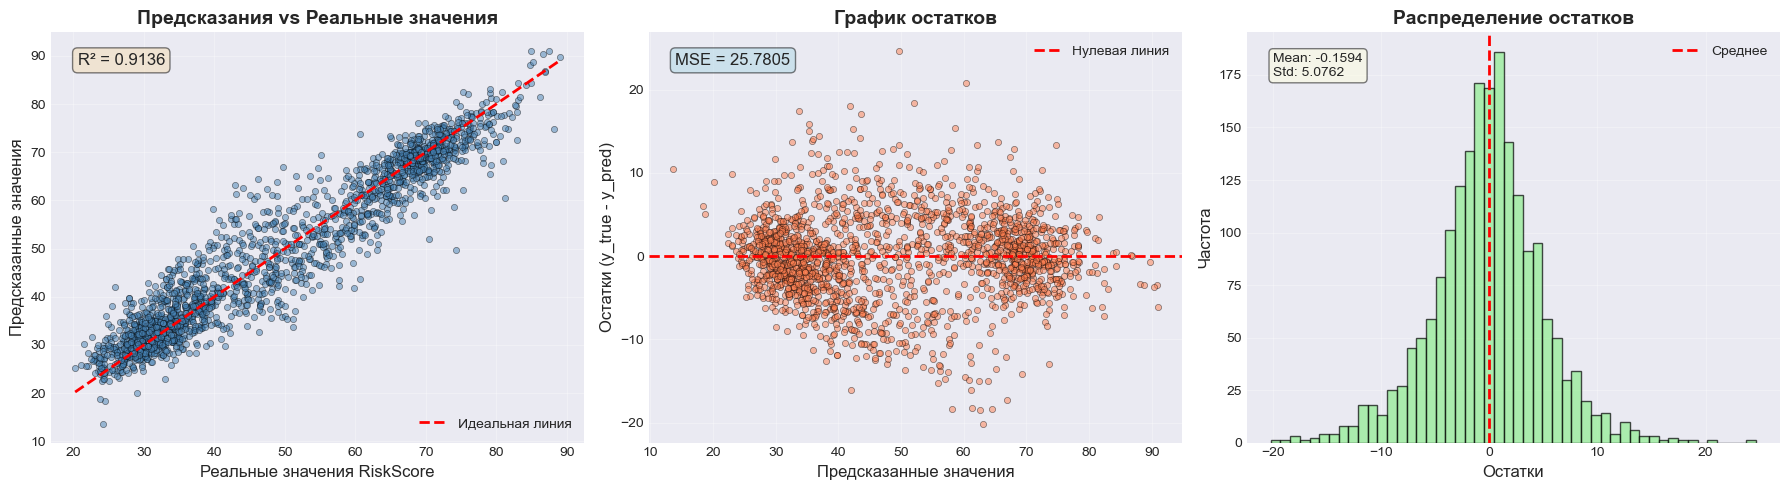

Анализ остатков
Среднее остатков:           -0.1594 (должно быть ≈0)
Стд. отклонение остатков:   5.0762
Минимальный остаток:        -20.1716
Максимальный остаток:       24.6400
Медиана остатков:           -0.0074


In [23]:
# визуализация результатов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Scatter plot
axes[0].scatter(y_val, y_pred, alpha=0.5, s=20, c='steelblue', edgecolors='black', linewidth=0.5)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Идеальная линия')
axes[0].set_xlabel('Реальные значения RiskScore', fontsize=12)
axes[0].set_ylabel('Предсказанные значения', fontsize=12)
axes[0].set_title('Предсказания vs Реальные значения', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# добавляем R² на график
axes[0].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[0].transAxes,
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2) график остатков
residuals = y_val - y_pred

axes[1].scatter(y_pred, residuals, alpha=0.5, s=20, c='coral', edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', lw=2, label='Нулевая линия')
axes[1].set_xlabel('Предсказанные значения', fontsize=12)
axes[1].set_ylabel('Остатки (y_true - y_pred)', fontsize=12)
axes[1].set_title('График остатков', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# добавляем MSE на график
axes[1].text(0.05, 0.95, f'MSE = {mse:.4f}', transform=axes[1].transAxes,
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# 3) распределение остатков
axes[2].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[2].axvline(x=0, color='red', linestyle='--', lw=2, label='Среднее')
axes[2].set_xlabel('Остатки', fontsize=12)
axes[2].set_ylabel('Частота', fontsize=12)
axes[2].set_title('Распределение остатков', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

# добавляем статистику остатков
axes[2].text(0.05, 0.95, 
            f'Mean: {residuals.mean():.4f}\nStd: {residuals.std():.4f}',
            transform=axes[2].transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()

# статистика остатков
print("Анализ остатков")
print(f"Среднее остатков:           {residuals.mean():.4f} (должно быть ≈0)")
print(f"Стд. отклонение остатков:   {residuals.std():.4f}")
print(f"Минимальный остаток:        {residuals.min():.4f}")
print(f"Максимальный остаток:       {residuals.max():.4f}")
print(f"Медиана остатков:           {residuals.median():.4f}")


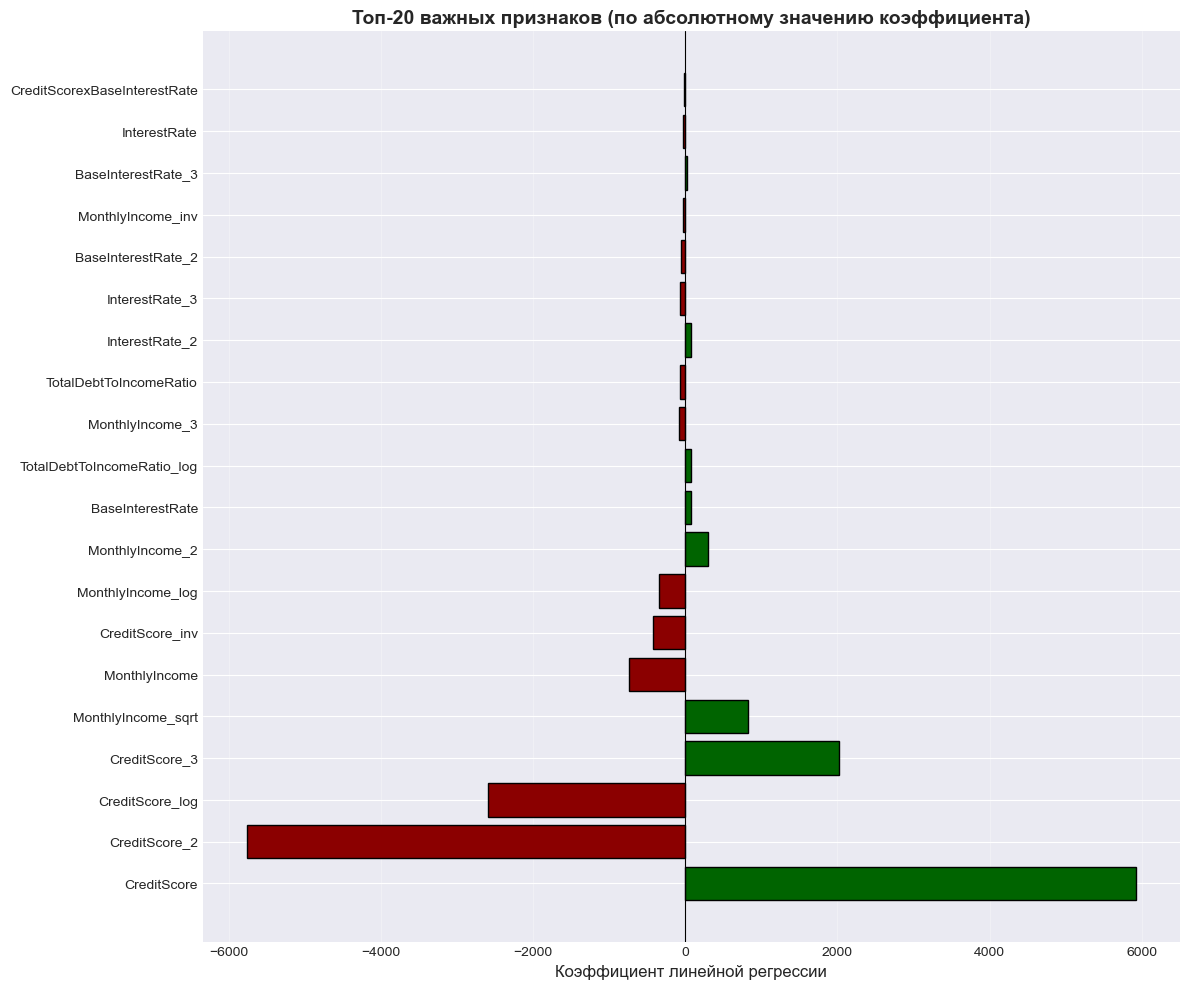

Топ-10 важных признаков
№   Признак                                      Коэффициент   |Коэффициент|
2   CreditScore                                  5919.599728     5919.599728
51  CreditScore_2                               -5759.191057     5759.191057
135 CreditScore_log                             -2593.887423     2593.887423
66  CreditScore_3                                2024.413061     2024.413061
134 MonthlyIncome_sqrt                            818.893999      818.893999
1   MonthlyIncome                                -739.239887      739.239887
144 CreditScore_inv                              -421.788123      421.788123
133 MonthlyIncome_log                            -344.168179      344.168179
50  MonthlyIncome_2                               298.697974      298.697974
4   BaseInterestRate                               80.094899       80.094899


In [24]:
# визуализация важности признаков (топ-20 по модулю коэффициента)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})

feature_importance['abs_coef'] = np.abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coef', ascending=False)

plt.figure(figsize=(12, 10))
top_20_features = feature_importance.head(20)
colors = ['darkred' if x < 0 else 'darkgreen' for x in top_20_features['coefficient'].values]

plt.barh(range(len(top_20_features)), top_20_features['coefficient'].values, 
         color=colors, edgecolor='black')
plt.yticks(range(len(top_20_features)), top_20_features['feature'].values)
plt.xlabel('Коэффициент линейной регрессии', fontsize=12)
plt.title('Топ-20 важных признаков (по абсолютному значению коэффициента)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# таблица признаков
print("Топ-10 важных признаков")
print(f"{'№':<3} {'Признак':<40} {'Коэффициент':>15} {'|Коэффициент|':>15}")
for i, row in feature_importance.head(10).iterrows():
    print(f"{i+1:<3} {row['feature']:<40} {row['coefficient']:>15.6f} {row['abs_coef']:>15.6f}")

### 10. Обучение и предсказание на тесте

In [25]:
# переобучаем на всех данных
model.fit(X_scaled, y)

preds = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'ID': range(len(preds)),
    'RiskScore': preds
})

submission.to_csv('submission.csv', index=False)
print(f"\nТестовые предсказания сохранены в файл 'submission.csv'")
print(f"Размер файла: {submission.shape}")




Тестовые предсказания сохранены в файл 'submission.csv'
Размер файла: (5000, 2)
